In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print("✅ Libraries loaded!")


✅ Libraries loaded!


In [4]:
df = pd.read_csv('cardio.csv', sep=';')
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (70000, 13)

First 5 rows:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nTarget distribution:")
print(df['cardio'].value_counts())
print(f"Cardio positive rate: {df['cardio'].mean():.2%}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None

Missing values:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco

In [7]:
print("Numeric Features Summary:")
df.describe()

Numeric Features Summary:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


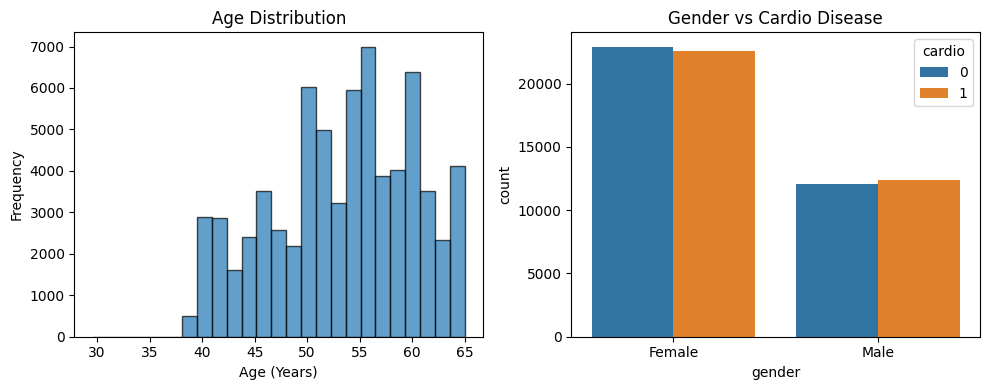

In [11]:
df['age_years'] = (df['age'] / 365).round(1)
df['bmi'] = df['weight'] / ((df['height']/100)**2)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df['age_years'], bins=25, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='gender', hue='cardio')
plt.title('Gender vs Cardio Disease')
plt.xticks([0, 1], ['Female', 'Male'])
plt.tight_layout()
plt.show()

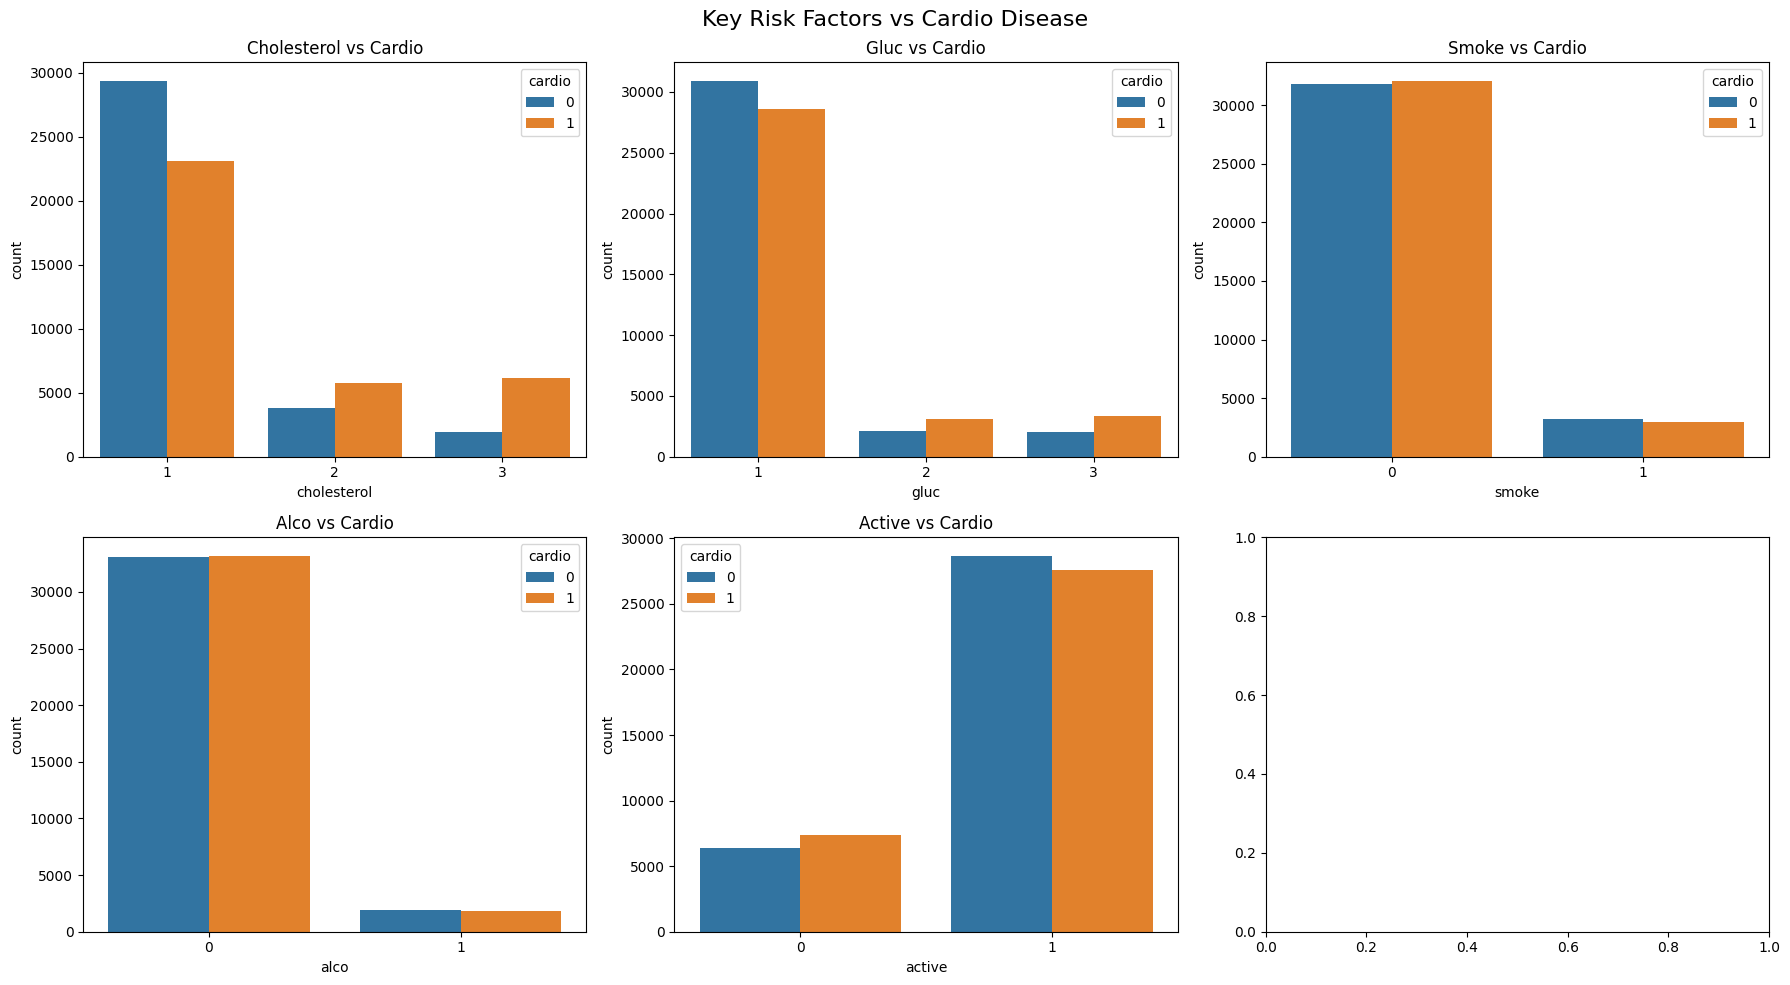

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Key Risk Factors vs Cardio Disease', fontsize=16)

risk_factors = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']
for i, factor in enumerate(risk_factors):
    row, col = i // 3, i % 3
    sns.countplot(data=df, x=factor, hue='cardio', ax=axes[row, col])
    axes[row, col].set_title(f'{factor.title()} vs Cardio')

plt.tight_layout()
plt.show()

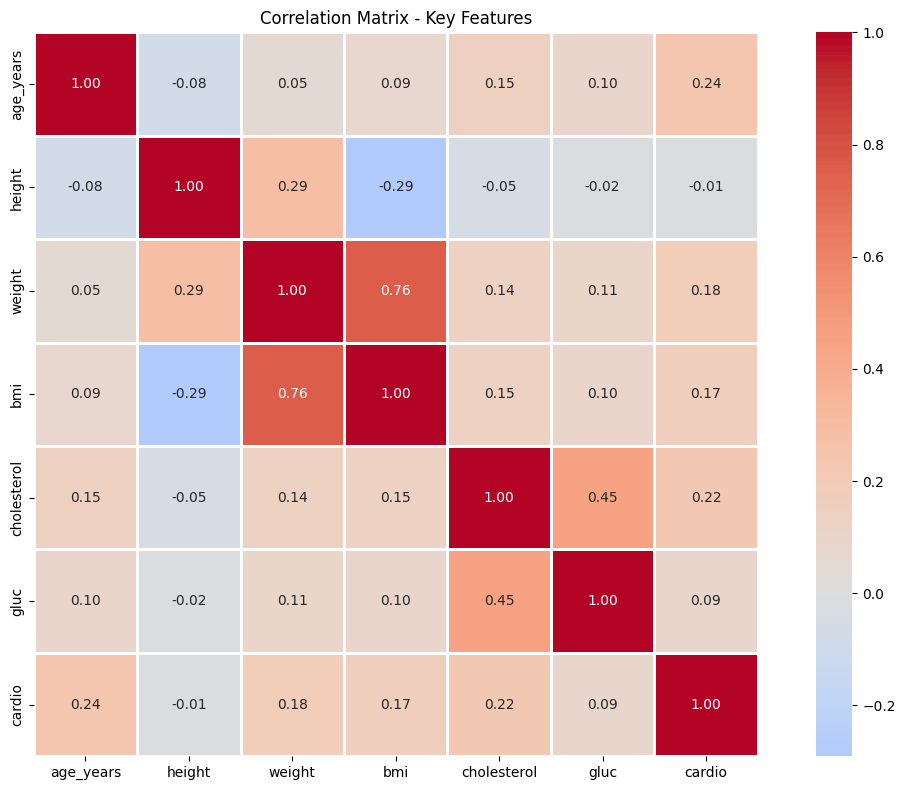

In [13]:
plt.figure(figsize=(12, 8))
numeric_cols = ['age_years', 'height', 'weight', 'bmi', 'cholesterol', 'gluc', 'cardio']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix - Key Features')
plt.tight_layout()
plt.show()

In [16]:
print("🔍 KEY INSIGHTS:")
print(f"• Total patients: {len(df):,}")
print(f"• Cardio cases: {df['cardio'].sum():,} ({df['cardio'].mean():.1%})")
print(f"• Age range: {df['age_years'].min():.0f}-{df['age_years'].max():.0f} years")
print(f"• Mean BMI: {df['bmi'].mean():.1f}")
print(f"• Mean Height: {df['height'].mean():.0f} cm")
print(f"• Mean Weight: {df['weight'].mean():.0f} kg")

numeric_cols_no_target = ['age_years', 'height', 'weight', 'bmi', 'cholesterol', 'gluc']
available_cols = [col for col in numeric_cols_no_target if col in df.columns]
if available_cols:
    corr_with_cardio = df[available_cols].corrwith(df['cardio']).sort_values(ascending=False)
    print(f"\nTop correlations with cardio:")
    print(corr_with_cardio)
else:
    print("\nNo numeric columns available for correlation")

🔍 KEY INSIGHTS:
• Total patients: 70,000
• Cardio cases: 34,979 (50.0%)
• Age range: 30-65 years
• Mean BMI: 27.6
• Mean Height: 164 cm
• Mean Weight: 74 kg

Top correlations with cardio:
age_years      0.238137
cholesterol    0.221147
weight         0.181660
bmi            0.165632
gluc           0.089307
height        -0.010821
dtype: float64


In [17]:
if 'age_years' not in df.columns:
    df['age_years'] = (df['age'] / 365).round(1)
if 'bmi' not in df.columns:
    df['bmi'] = df['weight'] / ((df['height']/100)**2)

df_clean = df.drop('id', axis=1).copy()
df_clean.to_csv('cardio_clean.csv', index=False)
print("✅ Saved: cardio_clean.csv")
print(f"Clean dataset shape: {df_clean.shape}")
print("Columns:", list(df_clean.columns))
print("Ready for ML modeling!")

✅ Saved: cardio_clean.csv
Clean dataset shape: (70000, 14)
Columns: ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi']
Ready for ML modeling!
